In [1]:
!/opt/bin/nvdia-smi

/bin/bash: /opt/bin/nvdia-smi: No such file or directory


In [2]:
pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 32.4 MB/s eta 0:00:00


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import math
from IPython.display import Audio
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.io.wavfile import write
import librosa.display
#import visualkeras

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/人工智慧實務')

Mounted at /content/drive


In [5]:
SNORING_DATA_PATH = os.path.join('Snoring_Dataset','1')
NOT_SNORING_DATA_PATH = os.path.join('Snoring_Dataset','0')

In [6]:
SNORING_DATA_PATH

'Snoring_Dataset/1'

In [7]:
SNORING_FILE= os.path.join(SNORING_DATA_PATH,'1_0.wav')
NOT_SNORING_FILE = os.path.join(NOT_SNORING_DATA_PATH,'0_0.wav')

In [8]:
os.listdir('Snoring_Dataset')

['Snoring_dataset.txt', '0', '1']

In [9]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav,sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav,axis=-1)
    sample_rate = tf.cast(sample_rate,dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav,rate_in=sample_rate, rate_out=16000)
    return wav

In [10]:
wave = load_wav_16k_mono(SNORING_FILE)
nwave = load_wav_16k_mono(NOT_SNORING_FILE)

<ipython-input-11-a89b5292bedd>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_data = read(SNORING_FILE)


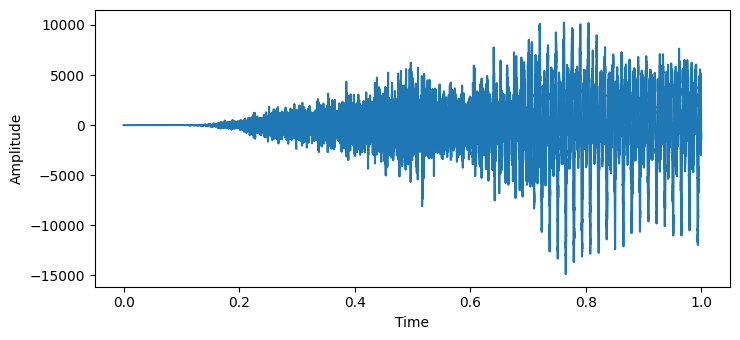

In [11]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read(SNORING_FILE)
x_1 = np.linspace(0, 1, 44100)

audio = input_data[1]
plt.plot(x_1,audio[0:44100])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

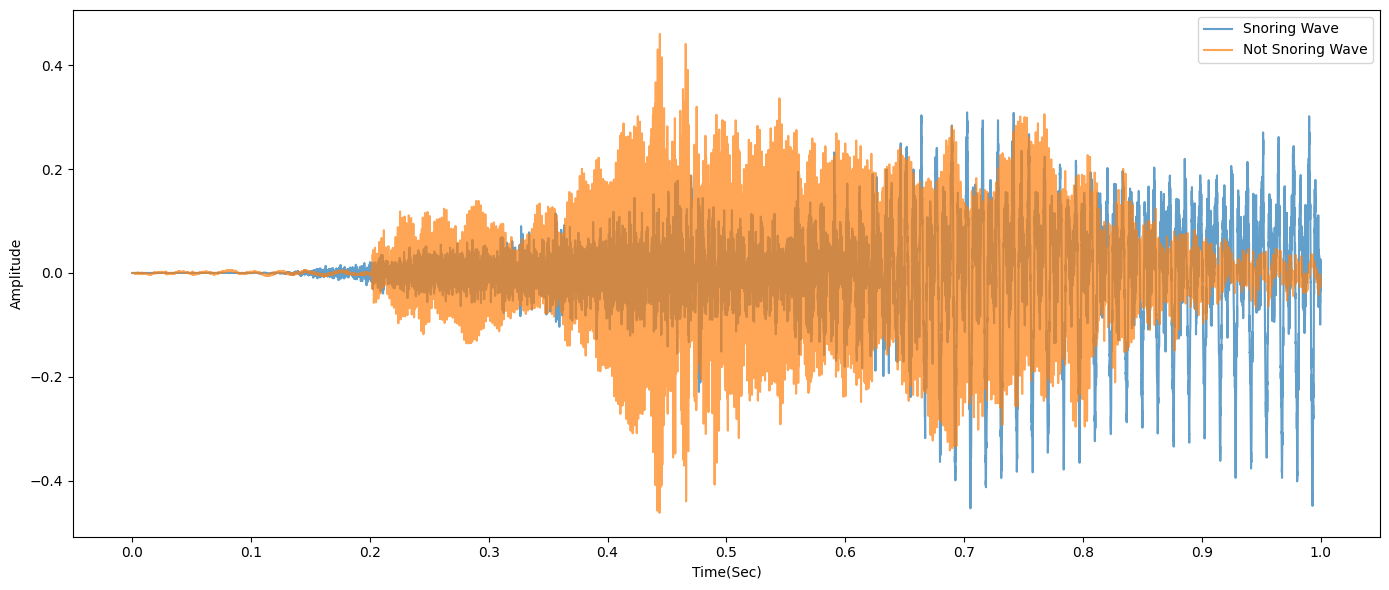

In [12]:
## plot 16000Hz to time

import numpy as np
x = np.linspace(0, 1, 16000)
plt.figure(figsize=(14, 6))
plt.plot(x,wave, alpha=0.7)
plt.plot(x,nwave, alpha=0.7)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')
plt.legend(labels=['Snoring Wave', 'Not Snoring Wave'])
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [13]:
pos = tf.data.Dataset.list_files(SNORING_DATA_PATH+'/*.wav')
neg = tf.data.Dataset.list_files(NOT_SNORING_DATA_PATH+'/*.wav')

In [14]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [15]:
print(len(data))

1000


In [16]:
lengths = []
for file in os.listdir(os.path.join(NOT_SNORING_DATA_PATH)):
    tensor_wave = load_wav_16k_mono(os.path.join(NOT_SNORING_DATA_PATH, file))
    lengths.append(len(tensor_wave))

In [17]:
os.listdir(os.path.join(SNORING_DATA_PATH))

['1_10.wav',
 '1_102.wav',
 '1_101.wav',
 '1_106.wav',
 '1_107.wav',
 '1_105.wav',
 '1_103.wav',
 '1_0.wav',
 '1_1.wav',
 '1_100.wav',
 '1_104.wav',
 '1_135.wav',
 '1_111.wav',
 '1_12.wav',
 '1_11.wav',
 '1_120.wav',
 '1_123.wav',
 '1_114.wav',
 '1_136.wav',
 '1_131.wav',
 '1_119.wav',
 '1_130.wav',
 '1_115.wav',
 '1_127.wav',
 '1_118.wav',
 '1_13.wav',
 '1_133.wav',
 '1_125.wav',
 '1_124.wav',
 '1_117.wav',
 '1_110.wav',
 '1_108.wav',
 '1_129.wav',
 '1_113.wav',
 '1_109.wav',
 '1_116.wav',
 '1_126.wav',
 '1_137.wav',
 '1_122.wav',
 '1_134.wav',
 '1_128.wav',
 '1_121.wav',
 '1_132.wav',
 '1_112.wav',
 '1_142.wav',
 '1_141.wav',
 '1_152.wav',
 '1_161.wav',
 '1_138.wav',
 '1_151.wav',
 '1_158.wav',
 '1_16.wav',
 '1_166.wav',
 '1_162.wav',
 '1_157.wav',
 '1_140.wav',
 '1_147.wav',
 '1_160.wav',
 '1_150.wav',
 '1_167.wav',
 '1_145.wav',
 '1_143.wav',
 '1_15.wav',
 '1_159.wav',
 '1_154.wav',
 '1_156.wav',
 '1_14.wav',
 '1_149.wav',
 '1_155.wav',
 '1_148.wav',
 '1_146.wav',
 '1_144.wav',
 '1

In [18]:
lengths

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [19]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [20]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [21]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [22]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [23]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
#positives = Snoring , negatives = Not Snoring

In [24]:
wav = load_wav_16k_mono(filepath)
wav = wav[:16000]
wav

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([-5.6567387e-07,  1.6116541e-06, -1.1952845e-06, ...,
       -1.4560585e-01, -1.5633975e-01, -1.8488142e-01], dtype=float32)>

In [25]:
spectrogram, label = preprocess(filepath, label)

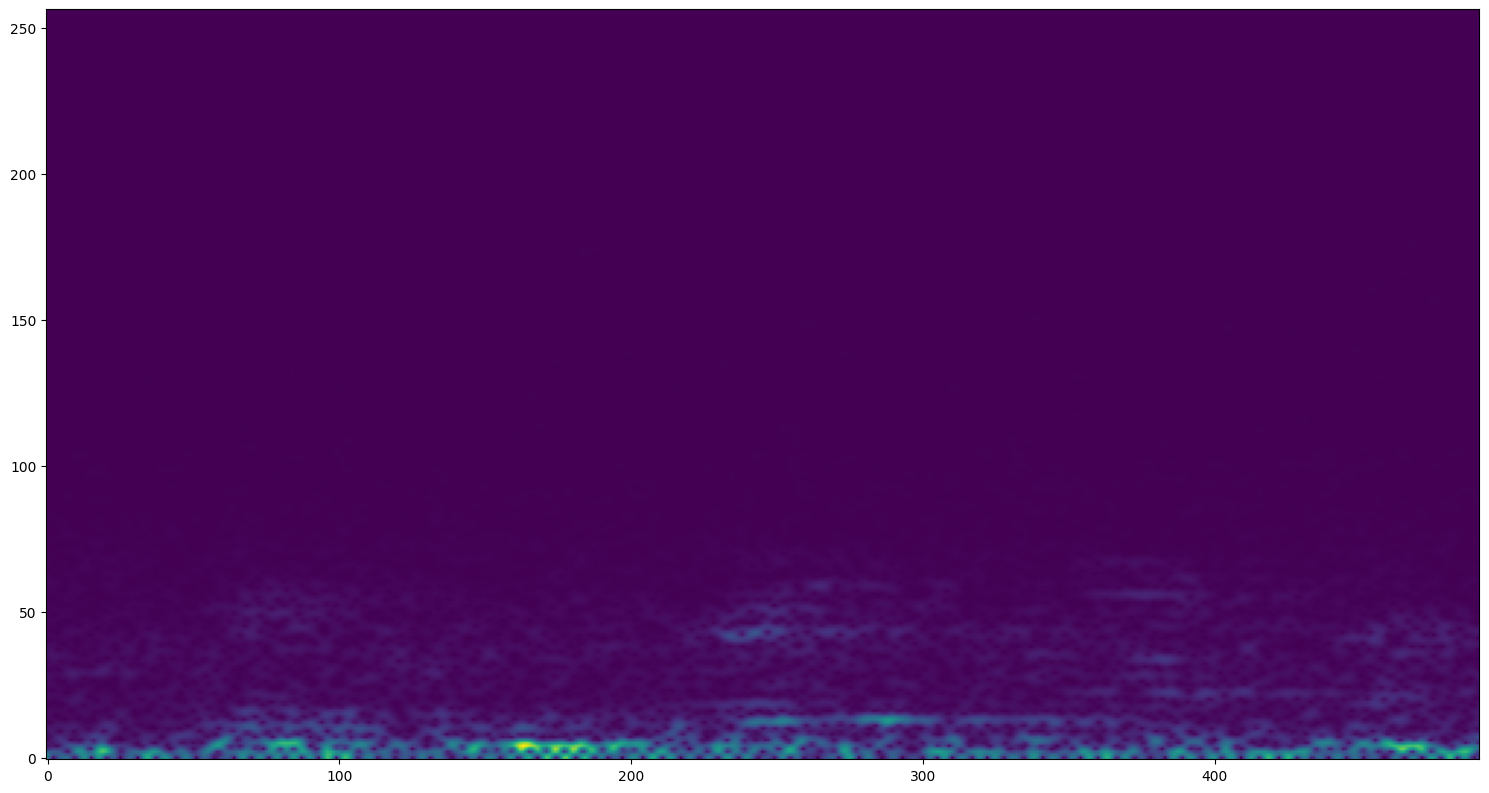

In [26]:
plt.figure(figsize=(15,8))
plt.imshow(tf.transpose(spectrogram)[0])
plt.gca().invert_yaxis()
plt.show()

In [27]:
data.as_numpy_iterator().next()

(b'Snoring_Dataset/1/1_15.wav', 1.0)

In [28]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(64)
data = data.prefetch(8)


In [29]:
len(data)

16

In [30]:
import math
train = data.take(math.ceil(len(data)*.7))
test = data.skip(math.ceil(len(data)*.7)).take(math.floor(len(data)*.3))

In [31]:
samples, labels = train.as_numpy_iterator().next()

In [32]:
samples.shape

(64, 491, 257, 1)

In [33]:
input_shape = samples.shape[1:]
input_shape

(491, 257, 1)

# Build model architecture

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D,Flatten
model=Sequential()

In [35]:
model.add(Dense(units=20,input_shape=input_shape,kernel_initializer='uniform',activation='relu'))

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=20,activation='relu'))

In [38]:
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [39]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 491, 257, 20)      40        
                                                                 
 flatten (Flatten)           (None, 2523740)           0         
                                                                 
 dense_1 (Dense)             (None, 20)                50474820  
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 50,474,881
Trainable params: 50,474,881
Non-trainable params: 0
_________________________________________________________________


In [41]:
train_history=model.fit(train,validation_data=test,epochs=10,batch_size=30,verbose=2)

Epoch 1/10
12/12 - 49s - loss: 0.6112 - recall: 0.5766 - precision: 0.5620 - val_loss: 0.4925 - val_recall: 0.8644 - val_precision: 0.6538 - 49s/epoch - 4s/step
Epoch 2/10
12/12 - 44s - loss: 0.4378 - recall: 0.8277 - precision: 0.6967 - val_loss: 0.4117 - val_recall: 0.8770 - val_precision: 0.7926 - 44s/epoch - 4s/step
Epoch 3/10
12/12 - 41s - loss: 0.4012 - recall: 0.8184 - precision: 0.7794 - val_loss: 0.3878 - val_recall: 0.8421 - val_precision: 0.7805 - 41s/epoch - 3s/step
Epoch 4/10
12/12 - 45s - loss: 0.3534 - recall: 0.8727 - precision: 0.8195 - val_loss: 0.3339 - val_recall: 0.8760 - val_precision: 0.8188 - 45s/epoch - 4s/step
Epoch 5/10
12/12 - 46s - loss: 0.3427 - recall: 0.8835 - precision: 0.8310 - val_loss: 0.2639 - val_recall: 0.9469 - val_precision: 0.8843 - 46s/epoch - 4s/step
Epoch 6/10
12/12 - 46s - loss: 0.3003 - recall: 0.9173 - precision: 0.8353 - val_loss: 0.2174 - val_recall: 0.9837 - val_precision: 0.9167 - 46s/epoch - 4s/step
Epoch 7/10
12/12 - 43s - loss: 0.2

In [42]:
history=model.fit(train,epochs=1,validation_data=test)

12/12 [==============================] - 44s 4s/step - loss: 0.1034 - recall: 0.9659 - precision: 0.9787 - val_loss: 0.0547 - val_recall: 0.9823 - val_precision: 1.0000


# Results of the model

In [43]:
loss = 'loss'
val_loss = 'val_loss'
recall = 'recall'
val_recall = 'val_recall'
precision = 'precision'
val_precision = 'val_precision'

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train_history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [45]:
history.history

{'loss': [0.10335879772901535],
 'recall': [0.9658792614936829],
 'precision': [0.978723406791687],
 'val_loss': [0.054717451333999634],
 'val_recall': [0.982300877571106],
 'val_precision': [1.0]}

NameError: ignored

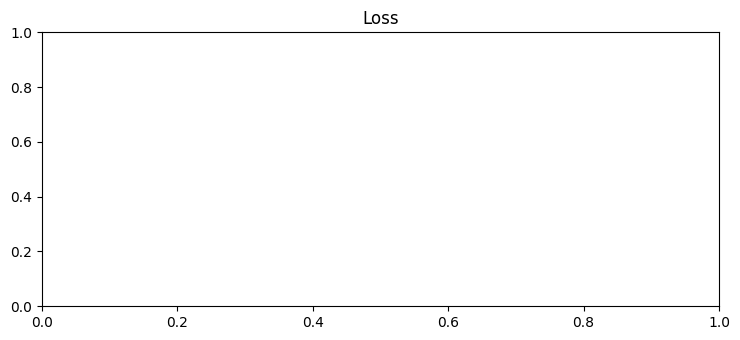

In [46]:
x_values = np.arange(1,11,1)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Loss')
plt.plot(x_values,hist.history[loss], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Loss',markersize=4)
plt.plot(x_values,hist.history[val_loss], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Loss',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[loss]
z = hist.history[loss]
val_z = hist.history[val_loss]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Loss = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-5, 25), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Loss = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-5, 15), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,3)

plt.title('Precision')
plt.plot(x_values,hist.history[precision], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Precision',markersize=4)
plt.plot(x_values,hist.history[val_precision], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Precision',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[precision]
z = hist.history[precision]
val_z = hist.history[val_precision]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Prec. = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Prec. = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()


In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Recall')
ax.plot(x_values,hist.history[recall], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Recall',markersize=4)
ax.plot(x_values,hist.history[val_recall], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Recall',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[recall]
z = hist.history[recall]
val_z = hist.history[val_recall]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Recall = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Recall = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

In [ ]:
fig, ax = plt.subplots()

f1 = []
val_f1 = []
for i in range (0,len(hist.history[recall])):
    f1.append(2 * (hist.history[recall][i] * hist.history[precision][i]) /
              (hist.history[recall][i] + hist.history[precision][i]))
    val_f1.append(2 * (hist.history[val_recall][i] * hist.history[val_precision][i]) /
              (hist.history[val_recall][i] + hist.history[val_precision][i]))
plt.rcParams['figure.figsize'] = (14,4)

plt.title('F1 Score')
ax.plot(x_values,f1, 'r',marker='o', linewidth=1,alpha=0.7,label = 'F1',markersize=4)
ax.plot(x_values,val_f1, 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation F1',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.legend()
plt.xticks(x_values)
x = x_values
y = f1
z = f1
val_z = val_f1
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('F1 = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. F1 = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()


# Test Data

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat_x_test = model.predict(X_test)

In [ ]:
yhat_x_test = [1 if prediction > 0.5 else 0 for prediction in yhat_x_test]

In [ ]:
yhat_x_test

In [ ]:
y_test.astype(int)

In [ ]:
confusion_matrix(y_test.astype(int),yhat_x_test)